# Assignment #3 - Cleaning & EDA

----

## Part 1 - EDA

#### <span style="color:#C8C8C8">Assignment #1</span>

### Introduction to Problem

&nbsp;&nbsp;&nbsp;&nbsp; The problem we are investigating relates to the disparities that exist in both the decision to initiate and resultant outcome of traffic stops in San Diego. Moreover, we are particulalry concerned with how these policing practices differ amongst those in different racial and ethnic groups. Previous research has shown that minority drivers are subject to disproportionate stop and post-stop outcomes compared with white drivers. In an effort to learn more about this issue the group from San Diego State University, in conjunction with the San Diego Police Department, gathered a wide range of data in an attempt to expose any sort of unjust biases in the department's policing practices. Their full analysis of post-stop outcomes can be found [here](https://spa.sdsu.edu/documents/Traffic_enforcement.pdf).

&nbsp;&nbsp;&nbsp;&nbsp; The bulk of the data accumulated for this study came from the **`259,569`** traffic stops initiated by the San Diego Police Department officers between **`January 1, 2014`** and **`December 31, 2015`**. Officers were instructed to complete traffic stop cards upon completion of a stop in an attempt to keep track of their decision-making process as well as identify patterns in the following areas:

- *The basis upon which an officer decides to initiate a traffic stop.*
- *The decision an officer makes as to whether or not they'll issue a citation.*
- *Whether or not an officer decides to conduct a field review.*
- *Following initial contact with the driver, the decision of whether or not to conduct a search.*
- *After the search, whether or not any contraband (firearms, narcotics, copious amounts of money, etc.) is discovered.*
- *The ultimate decision an officer makes of whether or not to make an arrest.*

To address this problem, my analysis will examine the effects of driver race on traffic enforcement in San Diego. I will do so by first performing a careful analysis of stop rates across the county, then look at a number of the main post-stop outcomes, and wrap up by attempting to replicate the *Veil of Darkness* experiment while making note of its advantages and shortfalls.

### Introduction to Data and Data Generating Process

&nbsp;&nbsp;&nbsp;&nbsp; This data is appropriate to address the problem identified above because it provides insight into the most important parts of a traffic stop and the events that transpire, if any. Although this data is not complete, it allows us to reliably break down the stop and search rates for all traffic stops on record. The reliability of these numbers may be skewed due to other factors that we'll mention later, but to acquire this information straight from the officers on the road provides us with valuable information that we wouldn't have had access to otherwise. 

&nbsp;&nbsp;&nbsp;&nbsp; In addition to what is included in the traffic stop card, this data is appropriate to address the problem in question in other ways. The traffic stop data was collected over the course of a two year period, thus giving us year-round statisitcs and omitting the possibility of missing out on seasonal traffic patterns, searches, and seizures. Additionally, San Diego is one of the safest cities in the nation with the second lowest violent crime rate (**`3.81`** per **`1,000`** residents) among the country’s **`32`** cities with populations greater than **`500,000`**. I believe this improves the parity of the traffic stops data. The San Diego State University report only includes those stops wherein the officer was obligated to make a judgement call (i.e. equiptment malfunctions and moving vioations). 

&nbsp;&nbsp;&nbsp;&nbsp; While the sample size for traffic stops is quite large, there are potential shortcomings that do exist. It was stated in the reports that the volume of traffic stop cards decreased steadily from **`January of 2014`** to **`December of 2015`**. The report states:

> *We do not know whether these trends reflect a change in SDPD policy and/or leadership, a natural seasonal shift in driving patterns, or some other factor.*

&nbsp;&nbsp;&nbsp;&nbsp; Also, there are some pieces of information that are not mandated by the traffic stop cards. These include, but are not limited to:

- *The race/ethnicity of the officer conducting the traffic stop.*
- *Specific geo-location of the stop and/or search.*
- *Demeanor of the driver/passenger.*

&nbsp;&nbsp;&nbsp;&nbsp; Lastly, since the traffic stop cards are completed by humans the validity of what is recorded is prone to human error. As stated in the report, there are other factors that may affect the likelihood of certain post-stop outcomes. A couple of these factors include officer demographics and officer performance history. These have the potential to influence how lenient an officer acts during a stop, thus making it difficult to determine the proper scope of police discretion. In addition the age, make, model, and condition of the vehicle stopped and the demeanor of the driver can have an effect on how an officer chooses to conduct a traffic stop. These data are not collected, but it is clear that some citizens may suffer more severe consequences for the same infraction due to extenuating circumstances.

### Historical Context

&nbsp;&nbsp;&nbsp;&nbsp; This is not the first time that a study like this has been conducted. In **`2000`** and **`2001`**, in response to accusations of racial and ethnic bias, the San Diego Police Department used traffic stop cards to gather information from vehicle stops. These traffic stop cards included information about citation rates, search rates, hit (i.e. contraband found) rates, and arrest rates. However, this infomration was deemed unraliable due to the officers' lack of conssitency when it came to completing these cards after a stop. Thus, no causal links between both race and ethnicity and the likelihood of these various post-stop outcomes could be assured.

&nbsp;&nbsp;&nbsp;&nbsp; In addition to the traffic stop cards, this earlier study generated data from police officers using surveys and follow-up interviews. Additionally, they leveraged input from the community by conducting focus groups. The community focus groups were conducted in an attempt to gather contextual information about traffic stops from a different point of view. While the target population (citizens) is relevant to the task at hand, the makeup of this population was not ideal. The focus groups came from four San Diego Police Department divisions: 

- *Central*
- *Mid-City*
- *Southern*
- *Southeastern*

&nbsp;&nbsp;&nbsp;&nbsp; These diviisons were selected because they had the highest levels of crime, police activity, and racial/ethnic diversity. While the racial and ethnic diversity would provide a wide range of opinions, the fact that these groups were taken from high-crime areas explains why a tension between the SDPD and minority community members was found.

&nbsp;&nbsp;&nbsp;&nbsp; Additionally, at the time of the study there existed a shortage of officers in the San Diego area and the majority of officers were men. I believe this presents a data reliability issue seeing as though the population of police officers, especially those who agreed to the survey, was not representative of the nationwide population at the time.

&nbsp;&nbsp;&nbsp;&nbsp; My current analysis will attempt to combat the shortfalls of this previous study by pulling traffic stops data from the past five years. By using a fixed effects model in conjunction with the methods mentioned in the introduction I hope to be able to move beyond the San Diego State University study and identify any stark differences that may exist in the way certain racial and ethnic groups are treated during traffic stops.

#### <span style="color:#C8C8C8">Assignment #2</span>

### Exploratory Data Analysis

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [259]:
!jupyter nbconvert --no-input --no-prompt assignment3.ipynb

[NbConvertApp] Converting notebook assignment3.ipynb to html
[NbConvertApp] Writing 345450 bytes to assignment3.html


&nbsp;&nbsp;&nbsp;&nbsp; I'll begin by importing the neccesary data using `run.py`:

In [226]:
!python run.py data

Ingesting data...
...done!
Cleaning data...
...done!


In [227]:
# read in survey data
raw_survey2014 = pd.read_csv('data/raw/stops_2014.csv')
raw_survey2015 = pd.read_csv('data/raw/stops_2015.csv')
raw_survey2016 = pd.read_csv('data/raw/stops_2016.csv')
raw_survey2017 = pd.read_csv('data/raw/stops_2017.csv')
raw_survey2018 = pd.read_csv('data/raw/stops_2018.csv')
raw_survey2019 = pd.read_csv('data/raw/stops_2019.csv')

cleaned_survey2014 = pd.read_csv('data/cleaned/stops_2014.csv')
cleaned_survey2015 = pd.read_csv('data/cleaned/stops_2015.csv')
cleaned_survey2016 = pd.read_csv('data/cleaned/stops_2016.csv')
cleaned_survey2017 = pd.read_csv('data/cleaned/stops_2017.csv')
cleaned_survey2018 = pd.read_csv('data/cleaned/stops_2018.csv')
cleaned_survey2019 = pd.read_csv('data/cleaned/stops_2019.csv')

&nbsp;&nbsp;&nbsp;&nbsp; We see the number of recorded stops per year dip a fair amount after the stringent enforcement of traffic stop cards ended in **`2015`**. However, these numbers continue to hold steady through the end of **`2018`** where we again see a sharp increase in the total number of recorded stops in **`2019`**. 

In [4]:
# number of recorded stops per yer
print('Number of Recorded Stops per Year: \n \
       2014: {} \n \
       2015: {} \n \
       2016: {} \n \
       2017: {} \n \
       2018: {} \n \
       2019: {}'.format(cleaned_survey2014.shape[0], 
                        cleaned_survey2015.shape[0],
                        cleaned_survey2016.shape[0], 
                        cleaned_survey2017[cleaned_survey2017['year'] == 2017].shape[0] + cleaned_survey2018[cleaned_survey2018['year'] == 2017].shape[0], 
                        cleaned_survey2018[cleaned_survey2018['year'] == 2018].shape[0] + cleaned_survey2019[cleaned_survey2019['year'] == 2018].shape[0], 
                        cleaned_survey2019[cleaned_survey2019['year'] == 2019].shape[0]))

Number of Recorded Stops per Year: 
        2014: 144164 
        2015: 115422 
        2016: 103051 
        2017: 102038 
        2018: 103096 
        2019: 161365


&nbsp;&nbsp;&nbsp;&nbsp; I mentioned earlier that the data we have access to is nowhere near complete. However, the attributes that are of the most interest to us in order to perform our analysis (`service_area`, `subject_race`, and `date_time`) have very low levels of missingness. The missingness rates seen below come from the stops that occured between **`2014`** and **`2018`** prior to the enactment of the *Racial and Identity Profiling Act of 2015*.

In [5]:
nulls_2014 = raw_survey2014[['stop_id', 'stop_cause', 'service_area', 'subject_race', 'date_time', 'arrested', 'searched', 'contraband_found']].isna().sum()
nulls_2015 = raw_survey2015[['stop_id', 'stop_cause', 'service_area', 'subject_race', 'date_time', 'arrested', 'searched', 'contraband_found']].isna().sum()
nulls_2016 = raw_survey2016[['stop_id', 'stop_cause', 'service_area', 'subject_race', 'date_time', 'arrested', 'searched', 'contraband_found']].isna().sum()
nulls_2017 = raw_survey2017[['stop_id', 'stop_cause', 'service_area', 'subject_race', 'date_time', 'arrested', 'searched', 'contraband_found']].isna().sum()
nulls_2018 = raw_survey2018[['stop_id', 'stop_cause', 'service_area', 'subject_race', 'date_time', 'arrested', 'searched', 'contraband_found']].isna().sum()

total_nulls = nulls_2014 + nulls_2015 + nulls_2016 + nulls_2017 + nulls_2018
total_stops = raw_survey2014.shape[0] + raw_survey2015.shape[0] + raw_survey2016.shape[0] + raw_survey2017.shape[0] + raw_survey2018.shape[0]

print('% of Null Values from 2014 to 2018 [Pre-RIPA]:')
(100 * (total_nulls / total_stops)).round(2).astype(str) + '%'

% of Null Values from 2014 to 2018 [Pre-RIPA]:


stop_id               0.0%
stop_cause           0.06%
service_area          0.0%
subject_race         0.15%
date_time            0.23%
arrested             9.45%
searched            10.02%
contraband_found    93.97%
dtype: object

&nbsp;&nbsp;&nbsp;&nbsp; For those columns that are similar in the data following the *Racial and Identity Profiling Act of 2015* we see far fewer missing values overall. The only attribute with a high rate of missingness among the aforementioned columns is the `basis_for_search` which makes sense. It is uncommon that an officer will need to conduct a search, thus the large number of missing (or '`N`') values.

In [6]:
nulls_2019 = raw_survey2019[['stop_id', 'date_stop', 'time_stop', 'beat', 'perceived_age', 'gend', 'race', 'contraband', 'reason_for_stop', 'basis_for_search', 'result']].isna().sum()

print('% of Null Values from 2018 to 2019 [Post-RIPA]:')
(100 * (nulls_2019 / raw_survey2019.shape[0])).round(2).astype(str) + '%'

% of Null Values from 2018 to 2019 [Post-RIPA]:


stop_id               0.0%
date_stop             0.0%
time_stop             0.0%
beat                  0.0%
perceived_age         0.0%
gend                  0.0%
race                  0.0%
contraband            0.0%
reason_for_stop       0.0%
basis_for_search    78.96%
result                0.0%
dtype: object

&nbsp;&nbsp;&nbsp;&nbsp; If racial biases did not exist in policing practices we would expect to see the proportion of races in our stops data match the proportion of different races in San Diego. We'll expand on this point later, but below we have listed the proportion of races that were stopped in San Diego between **`2014`** and **`2019`**.

In [7]:
race_2014 = cleaned_survey2014['subject_race'].value_counts()
race_2015 = cleaned_survey2015['subject_race'].value_counts()
race_2016 = cleaned_survey2016['subject_race'].value_counts()
race_2017 = cleaned_survey2017['subject_race'].value_counts()
race_2018 = cleaned_survey2018['subject_race'].value_counts()
race_2019 = cleaned_survey2019['subject_race'].value_counts()

total_races = race_2014.add(race_2015, fill_value=0).add(race_2016, fill_value=0).add(race_2017, fill_value=0).add(race_2018, fill_value=0).add(race_2019, fill_value=0)
print('% of Races Stopped from 2014 to 2019:')
(100 * (total_races / total_races.sum())).sort_values(ascending=False).round(2).astype(str) + '%'

% of Races Stopped from 2014 to 2019:


W    42.15%
H    29.98%
B     14.0%
A     5.77%
O     5.16%
F      0.9%
V     0.49%
P     0.36%
C     0.36%
I     0.34%
K      0.1%
X      0.1%
J     0.08%
L     0.05%
Z     0.05%
S     0.04%
D     0.04%
G     0.02%
U     0.02%
Name: subject_race, dtype: object

### Need for Cleaning - Overview of Schema 

#### 2014

&nbsp;&nbsp;&nbsp;&nbsp; The traffic stops data from **`2014`** mimics the ideal schema that the rest of the annual reports will follow in my analysis. The schema for this dataset is as follows:

- `stop_id`
- `stop_cause`
- `service_area`
- `subject_race`
- `subject_sex`
- `subject_age`
- `date_time`
- `date_stop`
- `time_stop`
- `arrested`
- `searched`
- `contraband_found`

&nbsp;&nbsp;&nbsp;&nbsp; We will now see how the rest of the years in our dataset deviate from this schema.

#### 2015 to 2017

&nbsp;&nbsp;&nbsp;&nbsp; The schema of the data from **`2015`** to **`2017`** follows closely with that of **`2014`** with a few minor differences. This data contains a few extra columns that are not of much use to us: 

- `sd_resident`
- `obtained_consent`
- `property_seized`

&nbsp;&nbsp;&nbsp;&nbsp; I elected to remove these columns when ingesting and cleaning the data due to their poor quality and lack of helpfulness when analyzing racial bias amonig police officers in San Diego.

#### 2018 [Pre-RIPA]

&nbsp;&nbsp;&nbsp;&nbsp; In additon to the columns that were removed from the data in **`2015`**, **`2016`**, and **`2017`** there are a few more attributes in **`2018 [Pre-RIPA]`** that needed to be removed in order to coincide with the schema mentioned at the top of this section. These include:

- `action`
- `search_type`
- `search_basis`

&nbsp;&nbsp;&nbsp;&nbsp; Moreover, unlike the previous years, this dataset did not include a `date_stop` or `time_stop` column. Therefore, this needed to be extracted from the `date_time` column and accounted for in the cleaning stage so that the data from **`2018 [Pre-RIPA]`** could be included in the *Veil of Darkness* experiment.

#### 2018 [Post-RIPA] to 2019

&nbsp;&nbsp;&nbsp;&nbsp; The **`[Post-RIPA]`** data was especilly difficult to deal with given that the schema differed wildly from what we saw earlier and the attributes that were accounted for are not the same either. The schema is as follows:

- `stop_id`
- `ori`
- `agency`
- `exp_years`
- `date_stop`
- `time_stop`
- `stopduration`
- `stop_in_response_to_cfs`
- `officer_assignment_key`
- `assignment`
- `intersection`
- `address_block`
- `land_mark`
- `address_street`
- `highway_exit`
- `isschool`
- `school_name`
- `address_city`
- `beat`
- `beat_name`
- `pid`
- `isstudent`
- `percieved_limited_english`
- `preceived_age`
- `perceived_gender`
- `gender_nonconforming`
- `gend`
- `gend_nc`
- `perceived_lgbt`

&nbsp;&nbsp;&nbsp;&nbsp; As you can see there are quite a few attributes that do not appear in the other datasets we have seen. While they may be helpful for other tasks I chose to alter them or get rid of them entirely so that they could be used in my analysis.

### Need for Cleaning - Cleaning

&nbsp;&nbsp;&nbsp;&nbsp; As I mentioned before, the unwanted columns in the data needed to be removed during the cleaning stage. These included:

- `sd_resident`
- `obtained_consent`
- `property_seized`
- `action`
- `search_type`
- `search_basis`

&nbsp;&nbsp;&nbsp;&nbsp; After removing these unwanted columns the dates of all the stops needed to be converted to datetime objects. The `date_time` column proves to be more useful split into several features as opposed to having them all in one. This will allow for the extraction of the year, month, day of the week, hour, and second of each traffic stop that has a non-null `date_time` on record. This occurs in the `convert_date` function where all of the necessary features are extracted before the `date_time` column is removed.

&nbsp;&nbsp;&nbsp;&nbsp; The rest of the cleaning occurs in the **`[Post-RIPA]`** data. First, a number of the columns had to be renamed to coincide with the columns in the **`[Pre-RIPA]`** data. The changes that were made are as follows:

- `beat` &#8594; `service_area`
- `perceived_age` &#8594; `subject_age`
- `gend` &#8594; `subject_sex`
- `race` &#8594; `subject_race`
- `contraband` &#8594; `contraband_found`
- `reason_for_stop` &#8594; `stop_cause`
- `basis_for_search` &#8594; `searched`
- `result` &#8594; `arrested`

&nbsp;&nbsp;&nbsp;&nbsp; Once all of the columns were renamed they needed to be re-encoded with the correct values to fit the rest of the datasets. The encodings I chose to use are as follows: 

#### **`subject_sex`**

&nbsp;&nbsp;&nbsp;&nbsp; Previously encoded as **1** or **2** in the **`[Post-RIPA]`** data, we needed to change these values to **`M`** and **`F`** respectively. The **`[Post-RIPA]`** data also had values of **0**, **3**, and **4** but I opted to encode these values as `NaN` seeing as though they did not match a majority of the genders in the **`[Pre-RIPA]`** data.

#### **`subject_race`**

&nbsp;&nbsp;&nbsp;&nbsp; The **`[Post-RIPA]`** data contained the following unique values for a citizen's race:

- `White`
- `Hispanic/Latino/a`
- `Black/African American`
- `Native American`
- `Middle Eastern or South Asian`
- `Asian`
- `Pacific Islander`

&nbsp;&nbsp;&nbsp;&nbsp; In order to match what was given in the **`[Pre-RIPA]`** data, these races were changed to:

- `W`
- `H`
- `B`
- `O`
- `A`
- `A`
- `P`

&nbsp;&nbsp;&nbsp;&nbsp; One important thing to note is the decision to encode both `Middle Eastern or South Asian` and `Asian` as `A`. I believed this to be the most reliable encoding for further analysis.

#### **`contraband_found`**

&nbsp;&nbsp;&nbsp;&nbsp; The contraband column in the **`[Pre-RIPA]`** data is encoded as either **`Y`** or **`N`**. However, the `contraband` column in the **`[Post-RIPA]`** data is more specific than a simple **`Y`** or **`N`**. Therefore, I decided to encode the `contraband` column as **`Y`** if any sort of contraband was discovered during a stop and **`N`** otherwise.

#### **`stop_cause`**

&nbsp;&nbsp;&nbsp;&nbsp; Earlier, it was stated that the SDSU report only includes those stops wherein the officer was obligated to make a judgement call. This included both equiptment malfunctions and moving vioations. Therefore, I made the decision to encode `Traffic Violation` and `Reasonable Suspicion` in the **`[Post-RIPA]`** data as a `Moving Violation` and all others as a `Code Violation`.

#### **`searched`**

&nbsp;&nbsp;&nbsp;&nbsp; In our analysis we are not all too concerned with what the basis for a search was during a traffic stop. Therefore, any basis that existed (i.e. was non-null) was encoded as **`Y`** and any null basis was encoded as **`N`**.

#### **`arrested`**

&nbsp;&nbsp;&nbsp;&nbsp; Lastly, the **`[Post-RIPA]`** data contains the results of every recorded traffic stop. To coincide with the `arrested` column in the **`[Pre-RIPA]`** any result that contained an arrest was encoded as **`Y`** and all other results were encoded as **`N`**.

### Stop Rates

&nbsp;&nbsp;&nbsp;&nbsp; We can start our analysis by revisiting the percentage of stops by race and comparing that with the demographics of San Diego as a whole.

In [8]:
print('% of Races Stopped from 2014 to 2019:')
(100 * (total_races / total_races.sum())).sort_values(ascending=False).round(2).astype(str) + '%'

% of Races Stopped from 2014 to 2019:


W    42.15%
H    29.98%
B     14.0%
A     5.77%
O     5.16%
F      0.9%
V     0.49%
P     0.36%
C     0.36%
I     0.34%
K      0.1%
X      0.1%
J     0.08%
L     0.05%
Z     0.05%
S     0.04%
D     0.04%
G     0.02%
U     0.02%
Name: subject_race, dtype: object

&nbsp;&nbsp;&nbsp;&nbsp; Unfortunately, the data available to us through [NHGIS](https://data2.nhgis.org) does not match that which we have ingested and cleaned from [Data SD](https://data.sandiego.gov). However, we still have access to the most prominent races in San Diego which will be crucial to our analysis.

In [9]:
census = pd.read_csv('data/census/county_census.csv', encoding ="ISO-8859-1")
sd_census = census[census['COUNTY'] == 'San Diego County']
sd_census = sd_census.filter(regex='2010')
race_dict = {'B08AA2010' : 'W', 
             'B08AB2010' : 'B', 
             'B08AC2010' : 'O', 
             'B08AD2010' : 'J', 
             'B08AE2010' : 'C', 
             'B08AF2010' : 'F', 
             'B08AG2010' : 'K', 
             'B08AH2010' : 'P', 
             'B08AI2010' : 'H', 
             'B08AJ2010' : 'O'}
sd_census = sd_census.rename(columns=race_dict).T
sd_census = sd_census.rename(columns={239 : 'total_pop'})
sd_census = sd_census['total_pop']

print('Demographics of San Diego [2010 Census]:')
(100 * (sd_census / sd_census.sum())).sort_values(ascending=False).round(2).astype(str) + '%'

Demographics of San Diego [2010 Census]:


W    64.22%
H    16.99%
O     5.13%
B     5.13%
F     4.75%
C     1.59%
O     0.83%
K     0.67%
J     0.61%
P     0.08%
Name: total_pop, dtype: object

&nbsp;&nbsp;&nbsp;&nbsp; We see quite the difference in the stop rates amongst racial groups in San Diego and the population makeup of the county. In order to get an idea of what might be at the root of this disparity we will take a look at the breakdown of stop rates by service area to see if anything interesting turns up.

In [101]:
cleaned_survey2014['minority'] = cleaned_survey2014['subject_race'].apply(lambda race: 'Non-Minority' if race == 'W' else 'Minority')
cleaned_survey2015['minority'] = cleaned_survey2015['subject_race'].apply(lambda race: 'Non-Minority' if race == 'W' else 'Minority')
cleaned_survey2016['minority'] = cleaned_survey2016['subject_race'].apply(lambda race: 'Non-Minority' if race == 'W' else 'Minority')
cleaned_survey2017['minority'] = cleaned_survey2017['subject_race'].apply(lambda race: 'Non-Minority' if race == 'W' else 'Minority')
cleaned_survey2018['minority'] = cleaned_survey2018['subject_race'].apply(lambda race: 'Non-Minority' if race == 'W' else 'Minority')
cleaned_survey2019['minority'] = cleaned_survey2019['subject_race'].apply(lambda race: 'Non-Minority' if race == 'W' else 'Minority')

combined = pd.DataFrame(pd.concat([cleaned_survey2014[['service_area', 'minority']], 
                                   cleaned_survey2014[['service_area', 'minority']], 
                                   cleaned_survey2014[['service_area', 'minority']], 
                                   cleaned_survey2014[['service_area', 'minority']], 
                                   cleaned_survey2014[['service_area', 'minority']], 
                                   cleaned_survey2014[['service_area', 'minority']]]))

print('% of Races Stopped by Service Area:')
(100 * combined.groupby(["service_area", "minority"]).size() / combined.groupby(["service_area"]).size()).round(2).astype(str) + '%'

% of Races Stopped by Service Area:


service_area  minority    
110           Minority        39.95%
              Non-Minority    60.05%
120           Minority        31.29%
              Non-Minority    68.71%
130           Minority        45.24%
              Non-Minority    54.76%
230           Minority        45.17%
              Non-Minority    54.83%
240           Minority        58.87%
              Non-Minority    41.13%
310           Minority        47.89%
              Non-Minority    52.11%
320           Minority        45.08%
              Non-Minority    54.92%
430           Minority        86.73%
              Non-Minority    13.27%
440           Minority        91.82%
              Non-Minority     8.18%
510           Minority        74.34%
              Non-Minority    25.66%
520           Minority        49.83%
              Non-Minority    50.17%
530           Minority        33.33%
              Non-Minority    66.67%
610           Minority        32.75%
              Non-Minority    67.25%
620        

&nbsp;&nbsp;&nbsp;&nbsp; Here we see quite a bit of variance in the percentage of minority (i.e. non-**`W`**) and non-minority (i.e. **`W`**) drivers that were stopped within each service area. We have places such as service area **`110`** that follows closely with the racial makeup of San Diego. However, we also see areas such as service area **`440`** where **`91.82%`** of those stopped were minority citizens. This service area happens to overlap with the southeastern division of San Diego wherein there lies a large hispanic population.

&nbsp;&nbsp;&nbsp;&nbsp;  All of the service areas in our dataset are well accounted for with the largest portion of stops come from serive area **`310`** which represents the eastern portion of San Diego. This service area contains portions of **`Interstate 8`** as well as **`Interstates 805`** and **`15`**. These roads are major thoroughfares for people commuting to and from work. The same goes for the northern division represented by service area **`120`**. A majority of stops in this area concern non-minority citizens. This area contains a large portion of **`Interstate 5`** including where it intersects with **`Interstate 8`** as was mentioned earlier.

### Post-Stop Outcomes

&nbsp;&nbsp;&nbsp;&nbsp; There are two post-stop outcomes that we have access to across all of the years in our dataset: **`arrested`** and **`searched`**. We are curious to see whether or not citizens who were stopped for the same infraction are treated differently due to some other variables during the stop. First, we'll conduct a hypothesis test to look at the difference of means between minority and non-minority groups as it realtes to the rates at which they are arrested.

In [200]:
combined = pd.DataFrame(pd.concat([cleaned_survey2014[['arrested', 'searched', 'minority']], 
                                   cleaned_survey2014[['arrested', 'searched', 'minority']], 
                                   cleaned_survey2014[['arrested', 'searched', 'minority']], 
                                   cleaned_survey2014[['arrested', 'searched', 'minority']], 
                                   cleaned_survey2014[['arrested', 'searched', 'minority']], 
                                   cleaned_survey2014[['arrested', 'searched', 'minority']]])).reset_index(drop=True)

In [201]:
iterations = 500
differences = []
for _ in range(iterations):
    
    shuffled_arrests = (
        combined['arrested']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    dic = {'Y' : 1, 
           'N' : 0, 
           'y' : 1, 
           'n' : 0, 
           ' ' : pd.np.nan}

    shuffled = (
        combined
        .assign(**{'shuffled_arrest': shuffled_arrests})
        .replace({"shuffled_arrest": dic})
        .fillna(0)
    )
    
    shuffled['shuffled_arrest'] = shuffled['shuffled_arrest'].astype('int')
    
    group_means = (
        shuffled[['minority','shuffled_arrest']]
        .groupby('minority')
        .mean()
        .loc[:, 'shuffled_arrest']
    )
    
    difference = group_means.diff().iloc[-1]
    differences.append(difference)
    
combined = combined.replace({'arrested' : dic})
combined = combined.fillna(0)
combined['arrested'] = combined['arrested'].astype('int')
observed_difference = (
    combined
    .groupby('minority')['arrested']
    .mean()
    .diff()
    .iloc[-1])

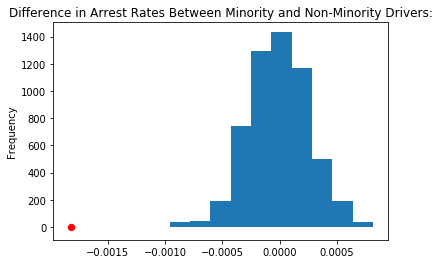

In [202]:
title = 'Difference in Arrest Rates Between Minority and Non-Minority Drivers:'
pd.Series(differences).plot(kind='hist', density=True, title=title)
plt.scatter(observed_difference, 0, color='red', s=40);
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp; This test shows that we fail to reject the null hypothesis of there being no difference between arrest rates for minority and non-minority groups. However, can the same be said for search rates?

In [203]:
iterations = 500
differences = []
for _ in range(iterations):
    
    shuffled_arrests = (
        combined['searched']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    dic = {'Y' : 1, 
           'N' : 0, 
           'y' : 1, 
           'n' : 0, 
           ' ' : pd.np.nan}

    shuffled = (
        combined
        .assign(**{'shuffled_searched': shuffled_arrests})
        .replace({"shuffled_searched": dic})
        .fillna(0)
    )
    
    shuffled['shuffled_searched'] = shuffled['shuffled_searched'].astype('int')
    
    group_means = (
        shuffled[['minority','shuffled_searched']]
        .groupby('minority')
        .mean()
        .loc[:, 'shuffled_searched']
    )
    
    difference = group_means.diff().iloc[-1]
    differences.append(difference)
    
combined = combined.replace({'searched' : dic})
combined = combined.fillna(0)
combined['searched'] = combined['searched'].astype('int')
observed_difference = (
    combined
    .groupby('minority')['searched']
    .mean()
    .diff()
    .iloc[-1])

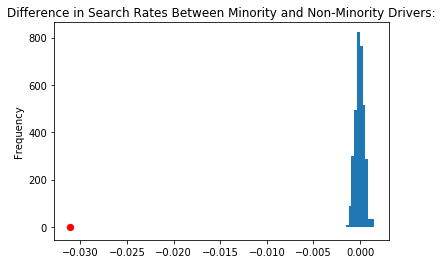

In [204]:
title = 'Difference in Search Rates Between Minority and Non-Minority Drivers:'
pd.Series(differences).plot(kind='hist', density=True, title=title)
plt.scatter(observed_difference, 0, color='red', s=40);
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp; Similar to before, after running our permutation test we are left with a **`p-value`** that is far above any normal significance value. 

In [217]:
combined = pd.DataFrame(pd.concat([cleaned_survey2014[['service_area', 'minority', 'searched', 'arrested']], 
                                   cleaned_survey2014[['service_area', 'minority', 'searched', 'arrested']], 
                                   cleaned_survey2014[['service_area', 'minority', 'searched', 'arrested']], 
                                   cleaned_survey2014[['service_area', 'minority', 'searched', 'arrested']], 
                                   cleaned_survey2014[['service_area', 'minority', 'searched', 'arrested']], 
                                   cleaned_survey2014[['service_area', 'minority', 'searched', 'arrested']]]))

print('% of Searches by Service Area:')
(100 * combined[combined['searched'] == 'Y'].groupby(["service_area", "minority"]).size() / combined[combined['searched'] == 'Y'].groupby(["service_area"]).size()).round(2).astype(str) + '%'

% of Searches by Service Area:


service_area  minority    
110           Minority        49.63%
              Non-Minority    50.37%
120           Minority         38.5%
              Non-Minority     61.5%
230           Minority        54.55%
              Non-Minority    45.45%
240           Minority        64.55%
              Non-Minority    35.45%
310           Minority        58.91%
              Non-Minority    41.09%
320           Minority        58.38%
              Non-Minority    41.62%
430           Minority        89.83%
              Non-Minority    10.17%
440           Minority        95.12%
              Non-Minority     4.88%
510           Minority        84.23%
              Non-Minority    15.77%
520           Minority        68.31%
              Non-Minority    31.69%
530           Minority        33.33%
              Non-Minority    66.67%
610           Minority        44.67%
              Non-Minority    55.33%
620           Minority        59.41%
              Non-Minority    40.59%
630        

In [218]:
print('% of Arrests by Service Area:')
(100 * combined[combined['arrested'] == 'Y'].groupby(["service_area", "minority"]).size() / combined[combined['arrested'] == 'Y'].groupby(["service_area"]).size()).round(2).astype(str) + '%'

% of Arrests by Service Area:


service_area  minority    
110           Minority        47.25%
              Non-Minority    52.75%
120           Minority        28.29%
              Non-Minority    71.71%
230           Minority        46.48%
              Non-Minority    53.52%
240           Minority        56.25%
              Non-Minority    43.75%
310           Minority        46.15%
              Non-Minority    53.85%
320           Minority        51.11%
              Non-Minority    48.89%
430           Minority         83.2%
              Non-Minority     16.8%
440           Minority        93.26%
              Non-Minority     6.74%
510           Minority        72.46%
              Non-Minority    27.54%
520           Minority        59.51%
              Non-Minority    40.49%
530           Minority         20.0%
              Non-Minority     80.0%
610           Minority        30.77%
              Non-Minority    69.23%
620           Minority        47.68%
              Non-Minority    52.32%
630        

&nbsp;&nbsp;&nbsp;&nbsp; We see that many of the search and arrest rates are higher for minority groups throughout San Diego when compared to the non-minority groups.

### Veil of Darkness

&nbsp;&nbsp;&nbsp;&nbsp; If we assume that racial differences in traffic patterns, driving behavior, and exposure to law enforcement do not vary between daylight and darkness, then we can test for racial profiling by comparing the distribution of races among stops made during daylight to the distribution of races among stops made after dark.

In [245]:
by_time = pd.concat([cleaned_survey2014[['hour', 'minute', 'time_stop', 'subject_race']], 
                     cleaned_survey2015[['hour', 'minute', 'time_stop', 'subject_race']], 
                     cleaned_survey2016[['hour', 'minute', 'time_stop', 'subject_race']], 
                     cleaned_survey2017[['hour', 'minute', 'time_stop', 'subject_race']],
                     cleaned_survey2018[['hour', 'minute', 'time_stop', 'subject_race']],
                     cleaned_survey2019[['hour', 'minute', 'time_stop', 'subject_race']]])

by_time = by_time.dropna()
by_time['time_stop'] = pd.to_datetime(by_time['time_stop'])

In [247]:
times = by_time['time_stop'].apply(lambda times: times.time())
intertwilight = (times >= pd.to_datetime('17:09', format='%H:%M').time()) & (times <= pd.to_datetime('20:29', format='%H:%M').time())

&nbsp;&nbsp;&nbsp;&nbsp; Here we see the race distribution of traffic stops during the inter-twilight period from **`5:09pm`** to **`8:29pm`**:

In [254]:
(100 * by_time[intertwilight]['subject_race'].value_counts(normalize=True)).round(2).astype(str) + '%'

W    37.41%
H    34.05%
B    12.65%
O     6.66%
A     4.54%
F     1.34%
V     0.84%
I     0.73%
C     0.73%
X     0.21%
P     0.18%
K     0.14%
L     0.13%
J     0.12%
S     0.08%
D     0.07%
Z     0.06%
U     0.04%
G     0.03%
Name: subject_race, dtype: object

In [255]:
non_intertwilight = (times <= pd.to_datetime('17:09', format='%H:%M').time()) | (times >= pd.to_datetime('20:29', format='%H:%M').time())

&nbsp;&nbsp;&nbsp;&nbsp; We can then compare those stops to the ones that occur outside of this inter-twilight period:

In [258]:
(100 * by_time[non_intertwilight]['subject_race'].value_counts(normalize=True)).round(2).astype(str) + '%'

W     42.6%
H    30.07%
B    11.38%
O     7.04%
A     4.81%
F     1.38%
V     0.77%
C     0.53%
I     0.52%
K     0.15%
X     0.14%
J     0.14%
P     0.12%
Z     0.09%
L     0.08%
S     0.07%
D     0.05%
G     0.03%
U     0.03%
Name: subject_race, dtype: object

#### <span style="color:#C8C8C8">Assignment #3</span>

### Shortcomings of Veil of Darkness

&nbsp;&nbsp;&nbsp;&nbsp; There are a few points concerning limitations of the *Veil of Darkness* experiment. It has been brought up that the estimates of stop rates are valid if, controlling for time, racial differences in the population at risk of being searched do not vary between day and night. Throughout this analysis we assumed that there is no seasonality in day-to-night risk of being searched or arrested. To handle this risk, our next iteration of analysis could focus on those stops that occurred near the switch to and from Daylight Saving Time, ensuring that all stops occurred in the same season.

&nbsp;&nbsp;&nbsp;&nbsp; The experiment may also be sensitive to violations associated with both driver’s race and darkness, such as having a headlight out. However, my analysis was not concerned with the inclusion or exclusion of such stops. Additonally, the results are limited to the inter-twilight period. The question of whether or not racial profiling occured during all other hours is still up to question. Moreover, the strength  of this experiment is reduced by anything that diminishes the correlation between visibility and darkness (i.e. **`fixed effects`**). In the case of two important examples, street lighting and car characteristics, the collection of additional data could help detect racial profiling. Lastly, this experiment is designed to analyze the extent of racial profiling in traffic stops only as opposed to any other feature of the traffic stop.

### Conclusion

&nbsp;&nbsp;&nbsp;&nbsp; In theory, a system of criminal law enforcement may serve many purposes: perhaps its goal is to punish, to deter, and to mark. However, the current system here in San Diego achieves these purposes at significant expense. Based on my analyses it appears as though there is widespread racial profiling taking place among officers in the force.

&nbsp;&nbsp;&nbsp;&nbsp; These findings have important implications regarding the management of police officer discretionary time, and the data-driven decision making skills of the officers. It is clear that if changes are desired, police departments must provide training to educate officers about their actions and the effects that they could have on innocent civilians no matter their racial group. 

&nbsp;&nbsp;&nbsp;&nbsp; Since officers form suspicions relatively infrequently, it may be necessary to create a workload analysis to determine how officer discretionary time is used. Our data show that not all searches resulted in an official arrest. This could mean that some of the criteria used by officers to perform searches are proper and valuable while other criteria are perhaps unjust and outdated (e.g. *Stop and Frisk*). Clearly, more attention needs to be paid to this area, but officers can benefit from the limited understanding of the process of undergoing a thorough traffic stop put on display throughout this report. My hope is that once this area of research has matured, we can be assured that all traffic stops are conducted justly without any bias toward the citizen in question.